The aim of this study is to investigate the factors influencing the salaries of Data Scientists.

To conduct this analysis, a dataset containing relevant information about Data Scientists was used. The dataset includes the following variables:

*   work_year:The year the salary was paid.
*   experience_level: The experience level in the job during the year (EN > Entry-level / Junior, MI> Mid-level / Intermediate, SE > Senior-level / Expert, EX > Executive-level / Director).
*   employment_type: The type of employment for the role (PT > Part-time, FT > Full-time, CT > Contract, FL > Freelance).
*   job_title: The role worked in during the year.
*   salary: The total gross salary amount paid.
*   salary_currency: The currency of the salary paid as an ISO 4217 currency code.
*   salaryinusd: The salary in USD.
*   employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.
*   remote_ratio:The overall amount of work done remotely.
*   company_location: The country of the employer's main office or contracting branch.
*   company_size: The median number of people that worked for the company during the year.

**PREGUNTA 1 (1 pto.): ¿Hay algún atributo o atributos que ya desecharías? Razónalo y elimínalo del dataset**

In [1]:
import pandas as pd

df = pd.read_csv('salaries.csv')

In [2]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Voy a eliminar las siguientes columnas ya que considero que no son necesarios para el objetivo del ejercicio
"""
employee_residence --> no considero necesario saber el lugar de residencia para obtener el salario
salary --> la columna salary_in_usd ya cumple la misma función que esta
salary_currency --> ya sabemos que el salario está siempre en dólares
employee_type --> 
"""
df.drop(['employee_residence', 'salary_currency', 'salary'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   employment_type   3755 non-null   object
 3   job_title         3755 non-null   object
 4   salary_in_usd     3755 non-null   int64 
 5   remote_ratio      3755 non-null   int64 
 6   company_location  3755 non-null   object
 7   company_size      3755 non-null   object
dtypes: int64(3), object(5)
memory usage: 234.8+ KB


# **PREPARACIÓN DE DATOS**

In [5]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [6]:
df['work_year'] = df['work_year'].map({2020: 0, 2021: 1, 2022:2, 2023:3})
df['work_year'].unique()

array([3, 2, 0, 1], dtype=int64)

In [7]:
df['experience_level']=df['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX':3})
df['experience_level'].unique()

array([2, 1, 0, 3], dtype=int64)

In [8]:
df['employment_type']=df['employment_type'].map({'FT': 0, 'CT': 1, 'FL': 2, 'PT':3})
df['employment_type'].unique()

array([0, 1, 2, 3], dtype=int64)

In [9]:
df['company_location']=df['company_location'].map({'ES': 0, 'US': 1, 'CA': 2, 'DE':3, 'GB':4, 'NG':5, 'IN':6, 'HK':7, 'NL':8, 'CH':9, 'CF':10, 'FR':11, 'FI':12, 'UA':13, 'IE':14, 'IL':15, 'GH':16, 'CO':17, 'SG':18, 'AU':19, 'SE':20, 'SI':21, 'MX':22, 'BR':23, 'PT':24, 'RU':25, 'TH':26, 'HR':27, 'VN':28, 'EE':29, 'AM':30, 'BA':31, 'KE':32, 'GR':33, 'MK':34, 'LV':35, 'RO':36, 'PK':37, 'IT':38, 'MA':39, 'PL':40, 'AL':41, 'AR':42, 'LT':43, 'AS':44, 'CR':45, 'IR':46, 'BS':47, 'HU':48, 'AT':49, 'SK':50, 'CZ':51, 'TR':52, 'PR':53, 'DK':54, 'BO':55, 'PH':56, 'BE':57, 'ID':58, 'EG':59, 'AE':60, 'LU':61, 'MY':62, 'HN':63, 'JP':64, 'DZ':65, 'IQ':66, 'CN':67, 'NZ':68, 'CL':69, 'MD':70, 'MT':71})
df['company_location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71], dtype=int64)

**PREGUNTA 2 (1 pto.): APLICA ONE-HOT ENCODING A employment_type, employee_residence Y A compay_location**

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2

In [11]:
categorical_features = ['employment_type', 'company_location']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

In [12]:
# one_hot_encoded = pd.get_dummies(df, columns=['employment_type', 'company_location'])

In [13]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [14]:
df['job_title']=df['job_title'].astype('category').cat.codes
df['job_title'].unique()

array([84, 66, 47,  8, 25, 38, 88,  4, 18, 69, 50, 33, 23, 41, 22, 31,  6,
        1, 89, 29, 17,  5, 91, 55, 32, 58, 45, 37, 73, 16, 49, 62, 13, 53,
       74, 67,  3,  9,  7, 64, 21, 57, 34, 90,  2, 40, 14, 44, 52, 11, 42,
       30, 70, 12, 59, 61, 51, 75, 15, 86, 24, 10, 78, 28, 35, 43, 72, 79,
       76, 68,  0, 85, 27, 26, 36, 46, 48, 20, 39, 77, 80, 87, 82, 71, 65,
       54, 19, 63, 60, 81, 83, 92, 56], dtype=int8)

In [15]:
df['company_size']=df['company_size'].map({'S': 0, 'M': 1, 'L': 2})
df['company_size'].unique()

array([2, 0, 1], dtype=int64)

**PREGUNTA 3 (1 pto.): ¿HAY ALGUNA VARIABLE QUE TENGA OUTLIERS? ¿CÓMO LO SOLUCIONARÍAS? JUSTIFICA LA RESPUESTA**

In [32]:
"""
    Para solucionar los outliers primero voy a mostrar una gráfica para identificarlos.
    Una vez ya identificados es más fácil eliminarlos. Eso si, hay que tener en cuenta
    que algunas veces no hay por que eliminarlos ya que tener un outlier podría indicar
    una información valiosa. Por ejemplo si el precio normal de unas acciones varia entorno a
     los 1000 y 2000 dólares y de repente vale 0, esto podría ser un outlier beneficioso ya
     que nos indicaría que el valor de las acciones ha bajado a 0€ lo cual sería importante
     tenerlo en cuenta de manera inmediata.
"""

'\n    Para solucionar los outliers primero voy a mostrar una gráfica para identificarlos.\n    Una vez ya identificados es más fácil eliminarlos. Eso si, hay que tener en cuenta\n    que algunas veces no hay por que eliminarlos ya que tener un outlier podría indicar\n    una información valiosa. Por ejemplo si el precio normal de unas acciones varia entorno a\n     los 1000 y 2000 dólares y de repente vale 0, esto podría ser un outlier beneficioso ya\n     que nos indicaría que el valor de las acciones ha bajado a 0€ lo cual sería importante\n     tenerlo en cuenta de manera inmediata.\n'

<Axes: xlabel='salary_in_usd', ylabel='remote_ratio'>

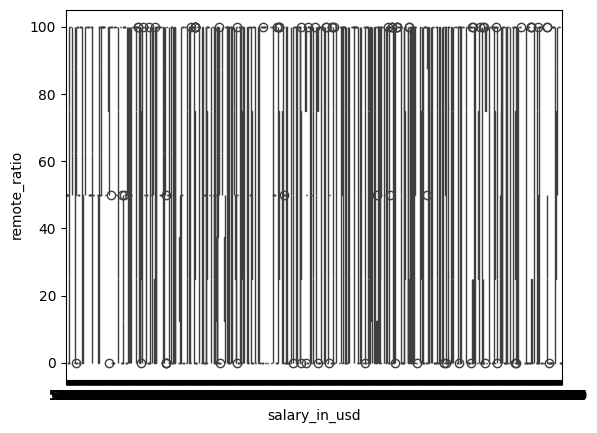

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = 'salary_in_usd', y = 'remote_ratio', data = df)

# **REDUCCIÓN DIMENSIONALIDAD**

**PREGUNTA 4 (2 PTOS.): APLICA CORRELACIÓN PARA REDUCIR LA DIMENSIONALIDAD**

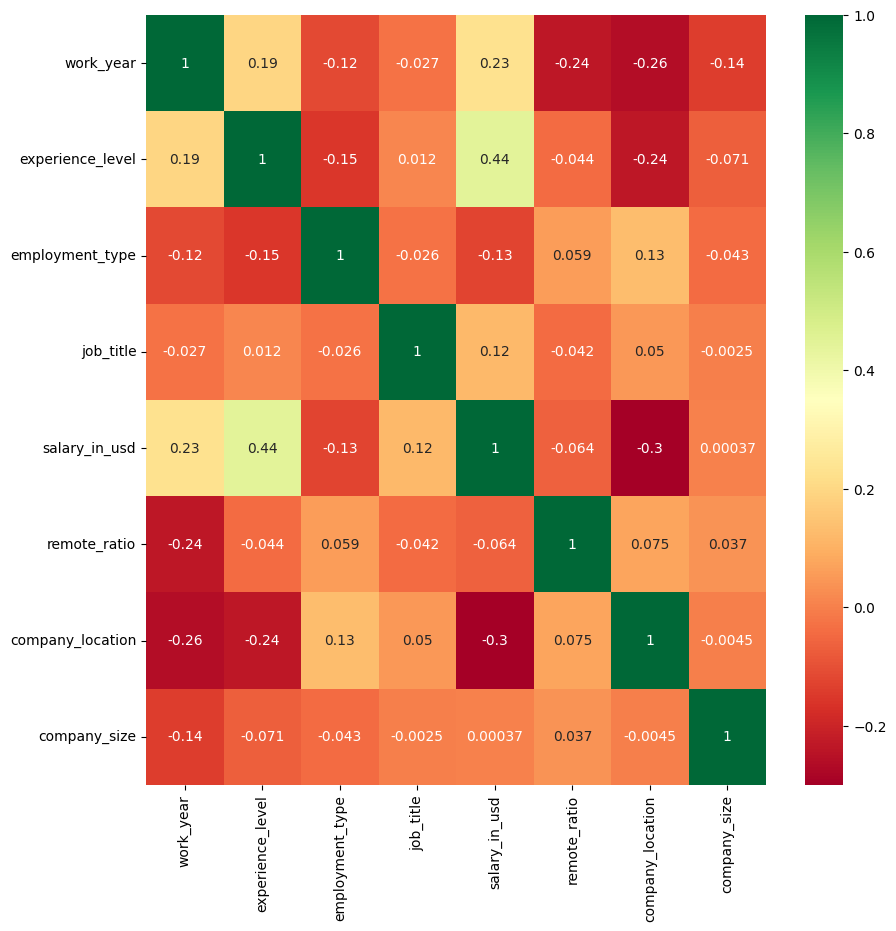

In [17]:
numeric_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
g=sns.heatmap(numeric_dataset.corr(), annot=True, cmap="RdYlGn") 

# **APRENDIZAJE SUPERVISADO**

**PREGUNTA 5 (1 PTO.): La variable objetivo será salary_in_usd. ¿Es un problema de clasificación o de regresión? Justifícalo**

In [18]:
"""
Es un problema de regresión ya que intenta predecir el salario basándose en el valor de una o más variables.
Además la regresión en comunmente utilizada para predecir precios.
    Ejemplo --> Predecir el precio de una vivienda.
                Predecir el valor de la bolsa.
                Predecir el valor de un producto.
Sin embargo el problema de clasificación se utiliza para otro tipo de predicciones que suelen ser binarias.
    Ejemplo --> Predecir si un paciente tiene cancer o no.
                Predecir si un cliente hará una compra o no.
                Predecir si un correo electrónico es spam o no.

"""

'\nEs un problema de regresión ya que intenta predecir el salario basándose en el valor de una o más variables.\nAdemás la regresión en comunmente utilizada para predecir precios.\n    Ejemplo --> Predecir el precio de una vivienda.\n                Predecir el valor de la bolsa.\n                Predecir el valor de un producto.\nSin embargo el problema de clasificación se utiliza para otro tipo de predicciones que suelen ser binarias.\n    Ejemplo --> Predecir si un paciente tiene cancer o no.\n                Predecir si un cliente hará una compra o no.\n                Predecir si un correo electrónico es spam o no.\n\n'

## **SVM**

**PREGUNTA 6 (3 PTOS.): APLICA SVM SIN NORMALIZAR (1 PTO.), Y LUEGO NORMALIZANDO (1 PTO.) Y COMPARA LOS RESULTADOS, ¿QUÉ MÉTRICAS USARÍAS? (1 PTO.)**

In [19]:
X = df.drop(["salary_in_usd"],  axis = 1)   
y = df["salary_in_usd"]

In [20]:
from sklearn.model_selection import train_test_split

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X, y, train_size=0.7)

In [21]:
X_train_SVM

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
1215,3,2,0,33,100,1,1
2038,2,2,0,33,0,0,1
2757,2,2,0,47,100,1,1
1418,3,2,0,47,0,1,1
2239,2,2,0,33,0,1,1
...,...,...,...,...,...,...,...
2196,2,1,0,25,0,1,1
3569,1,2,0,33,100,1,0
963,3,2,0,89,0,1,1
3655,0,1,0,17,100,1,2


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='linear')
modelo.fit(X_train_SVM,y_train_SVM)
y_pred_SVM = modelo.predict(X_test_SVM)
print(accuracy_score(y_test_SVM, y_pred_SVM))

0.04259094942324756


In [23]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_SVM)
X_test_std = scaler.fit_transform(X_test_SVM)

In [25]:
modelo = SVC(kernel='linear')
modelo.fit(X_train_std,y_train_SVM)
y_pred_SVM = modelo.predict(X_test_std)
print(accuracy_score(y_test_SVM, y_pred_SVM))

0.03992901508429459


In [ ]:
"""
    En este caso he obtenido mejores resultados sin normalizar. Tal vez esto se deba a que no haya
    normalizado correctamente los datos.
    Se podrían utilizar la métrica de Mean Absolute Error ya que esta nos indica el resultado real esperado y la
    predicción del modelo.
    También podría utilizar Mean Squared Error. En este caso, cuanto mayor es el resultado peor es el modelo.
"""

## **ÀRBOLES DE DECISIÓN**

**PREGUNTA 7 (1 PTO.): APLICA ÁRBOLES DE DECISIÓN. ¿ES NECESARIO NORMALIZAR?**

In [54]:
"""
    Podría normalizar para sacar mejores resultados pero tampoco sería algo necesario
"""
y = df['salary_in_usd']
X = df.drop(['salary_in_usd'], axis = 1)

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, train_size=0.7, random_state=245)

In [55]:
from sklearn import tree

modelo = tree.DecisionTreeClassifier(random_state=0)
modelo.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(random_state=0)

In [56]:
y_pred_DT = modelo.predict(X_test_DT)

In [57]:
print("Accuracy:", modelo.score(X_test_DT, y_test_DT))

Accuracy: 0.05146406388642413


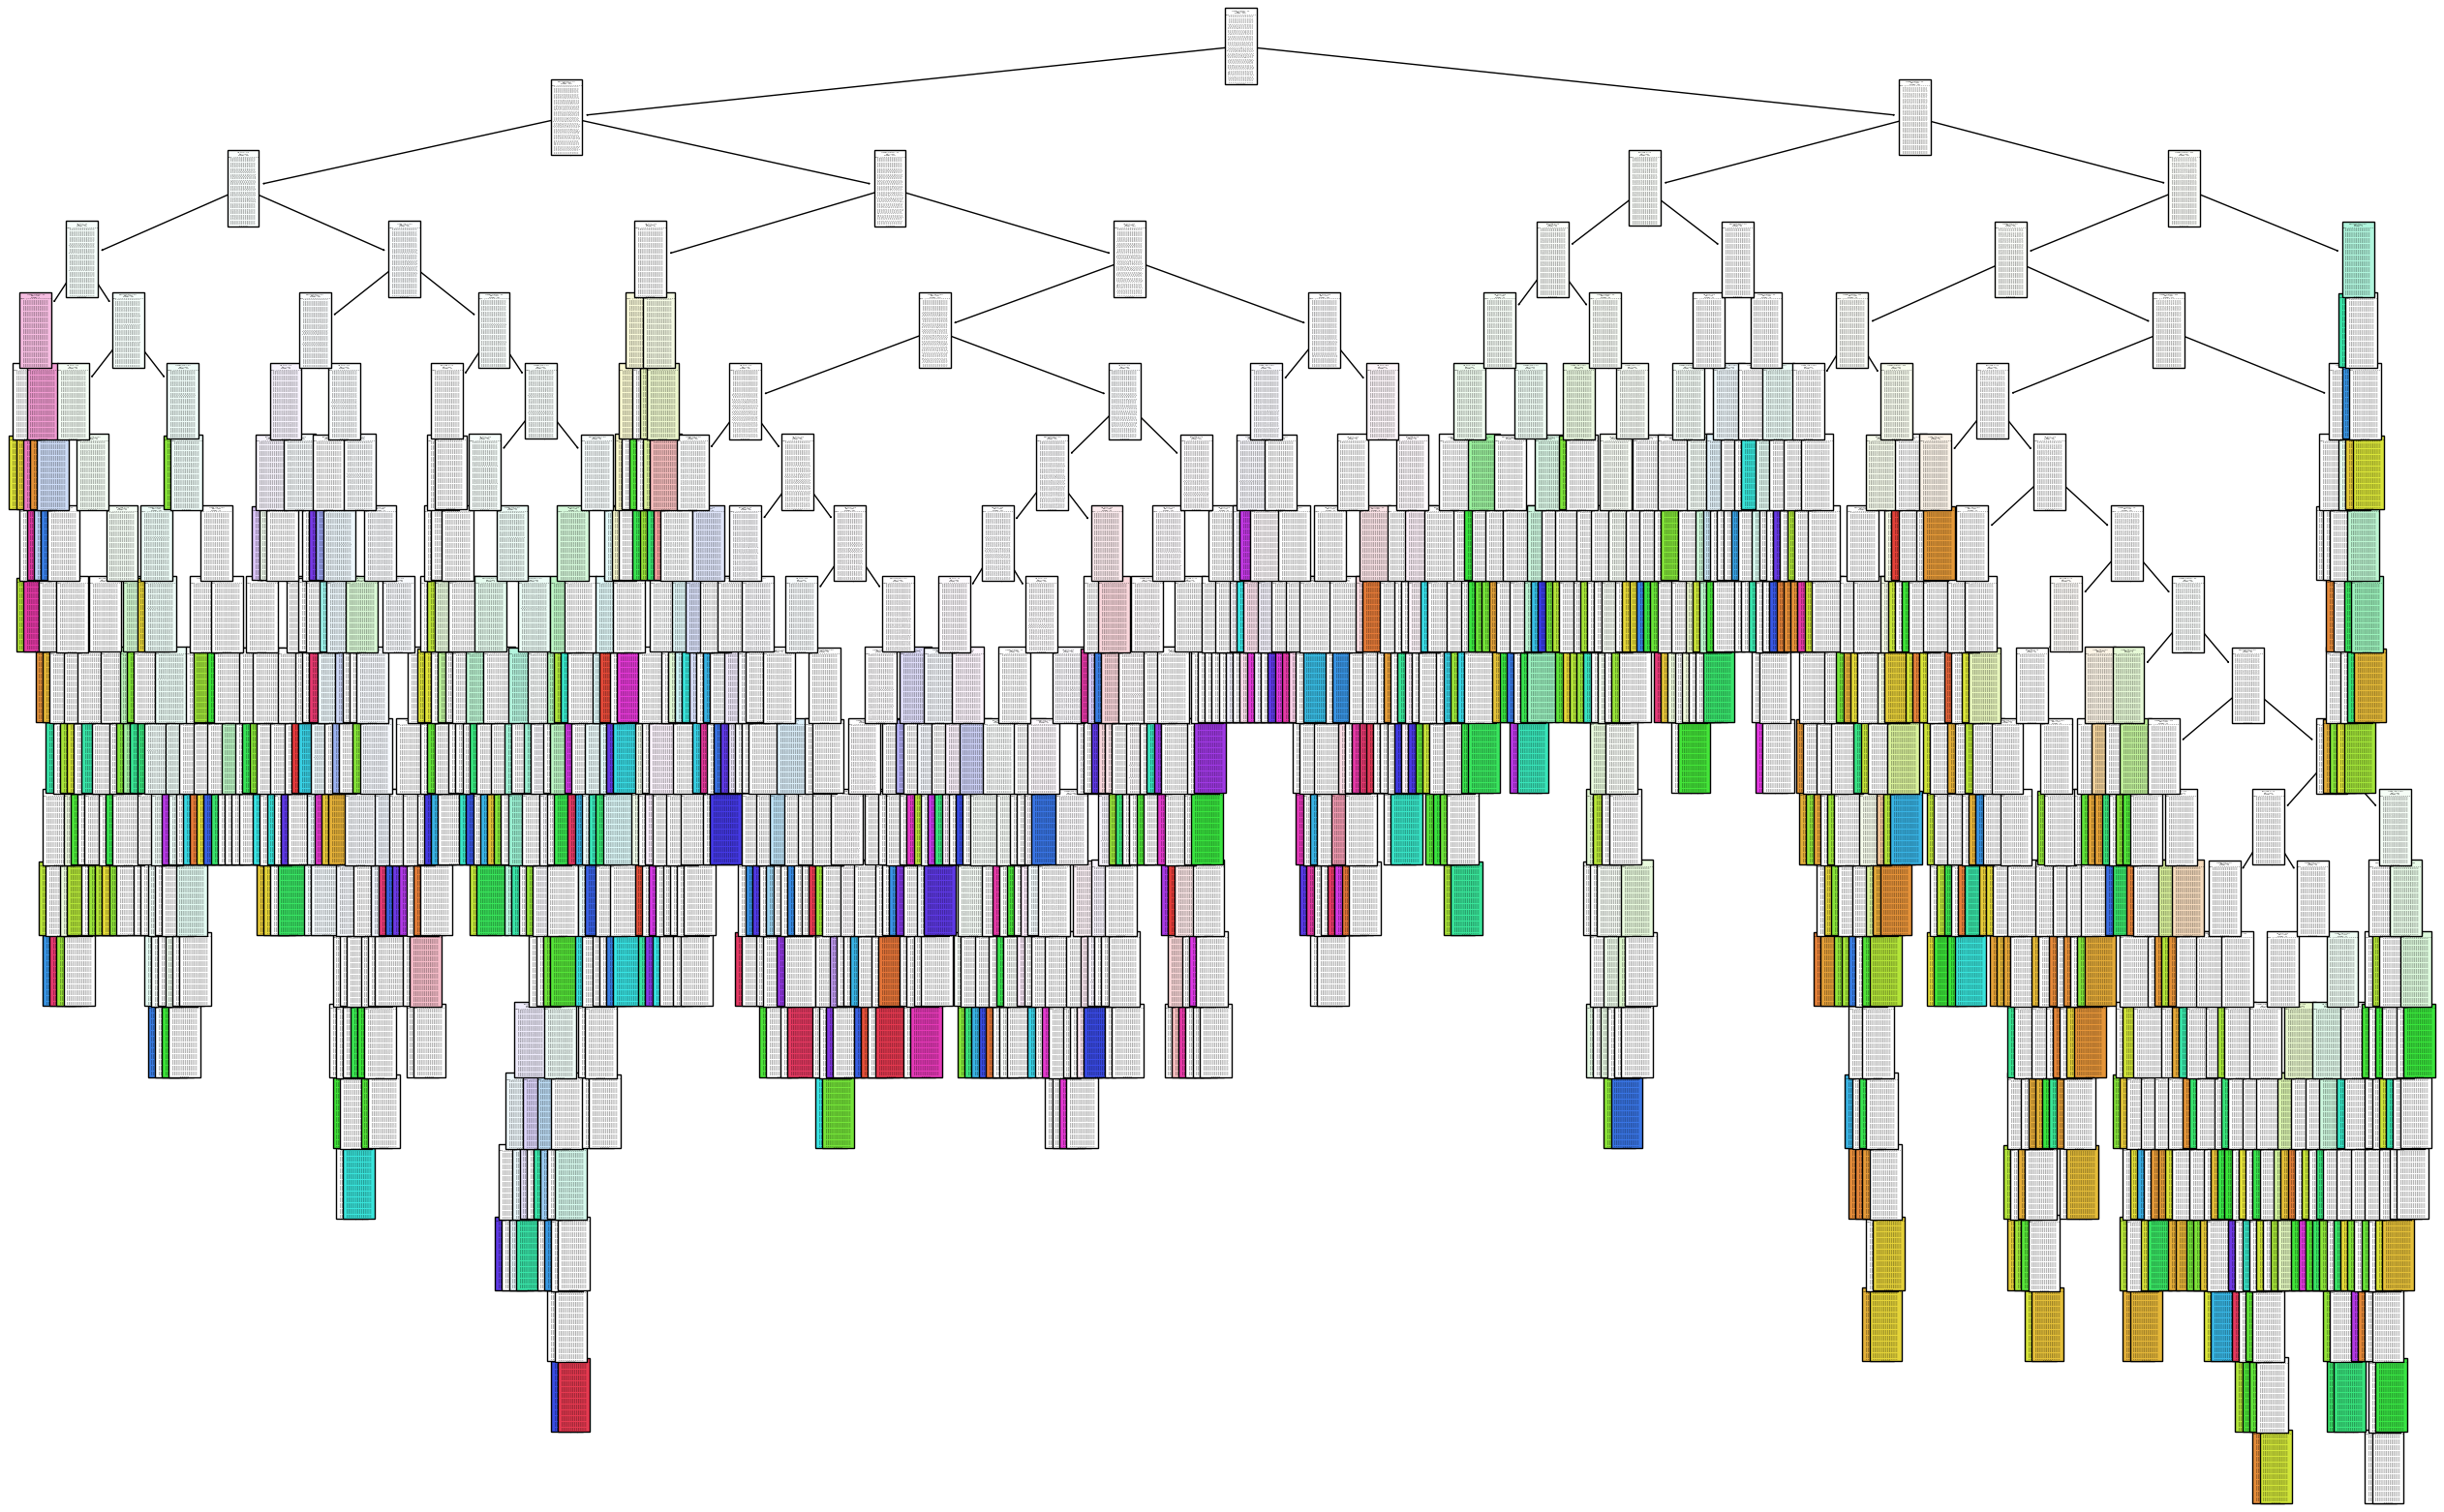

In [58]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize = (32, 20))
plot_tree(modelo, filled = True, feature_names = X.columns)
plt.show()